# 신경망 

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## 활성화 함수

* 계단함수

In [2]:
def step_function(x):
    return np.array(x > 0, dtype=np.int32)

(-0.1, 1.1)

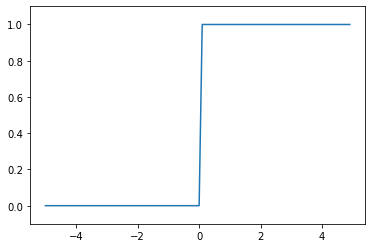

In [10]:
X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)

plt.plot(X, Y)
plt.ylim(-0.1, 1.1)

* 시그모이드 함수

In [11]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

(-0.1, 1.1)

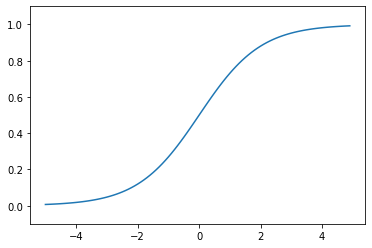

In [13]:
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)

plt.plot(X, Y)
plt.ylim(-0.1, 1.1)

* ReLU

In [17]:
def relu(x):
    return np.maximum(0, x)

(-1.0, 5.5)

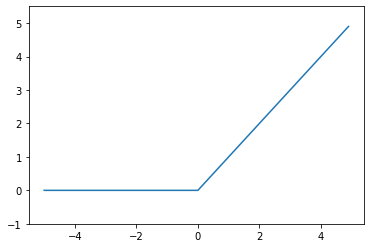

In [19]:
X = np.arange(-5.0, 5.0, 0.1)
Y = relu(X)

plt.plot(X, Y)
plt.ylim(-1.0, 5.5)

## 다차원 배열 계산

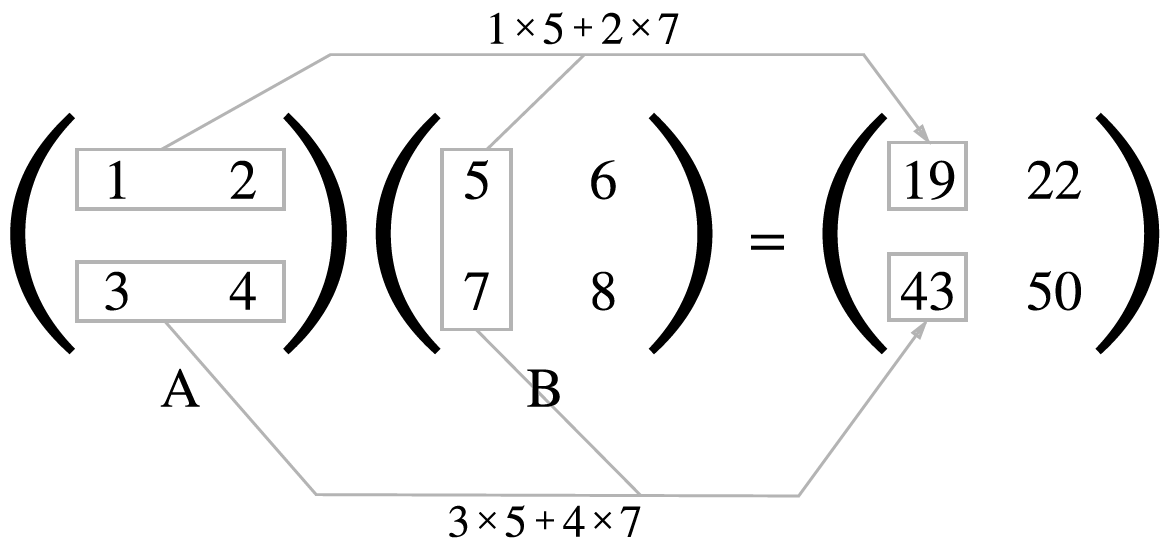

In [17]:
from IPython.display import Image
Image('./deep_learning_images/fig 3-11.png', width=400)

In [20]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

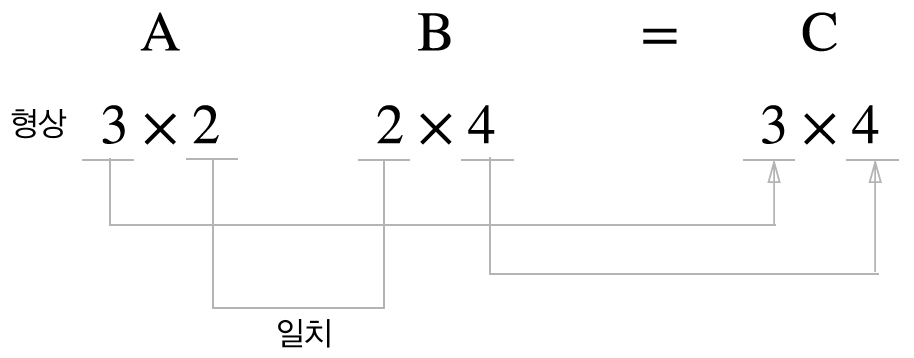

In [19]:
Image('./deep_learning_images/fig 3-12.png', width=400)

In [21]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([[7,8,9,10],[11,12,13,14]])
C = np.dot(A,B)
print(A.shape, B.shape, C.shape)

(3, 2) (2, 4) (3, 4)


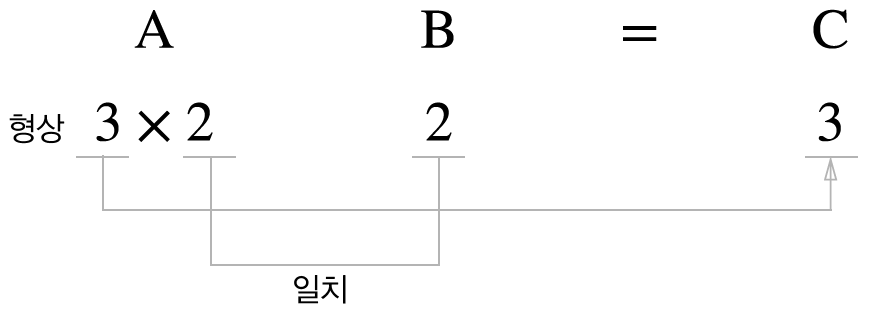

In [21]:
Image('./deep_learning_images/fig 3-13.png', width=400)

In [23]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([7, 8])
C = np.dot(A,B)
print(A.shape, B.shape, C.shape)

(3, 2) (2,) (3,)


## 신경망에서의 행렬곱

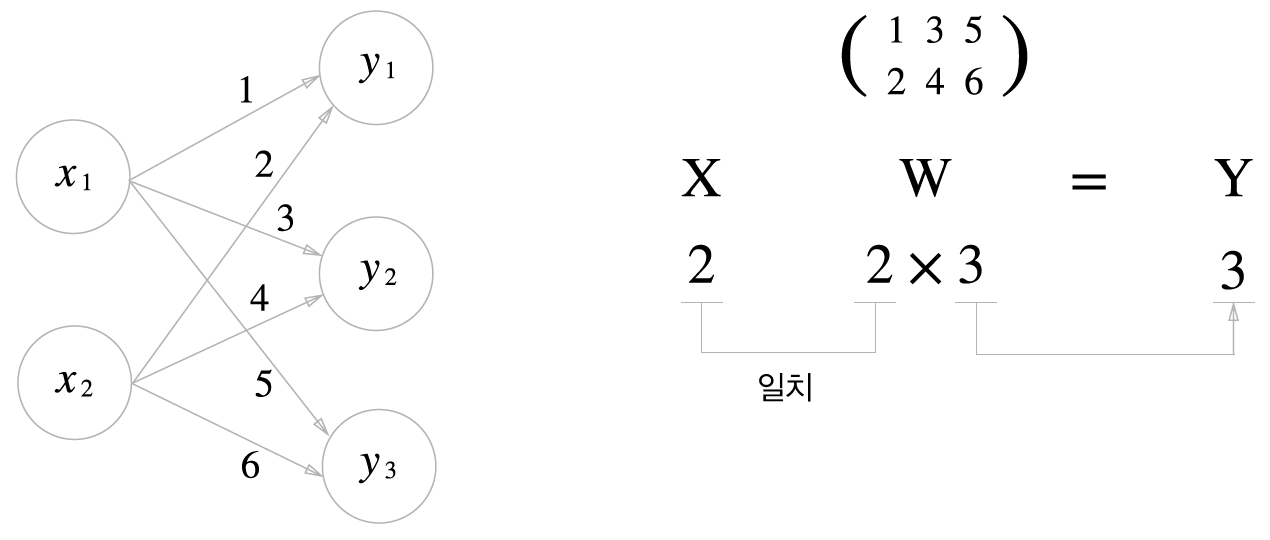

In [23]:
Image('./deep_learning_images/fig 3-14.png', width=400)

In [25]:
X = np.array([1, 2])
W = np.array([[1, 3, 5],[2, 4, 6]])
Y = np.dot(X, W)
print(X.shape, W.shape, Y.shape)

(2,) (2, 3) (3,)


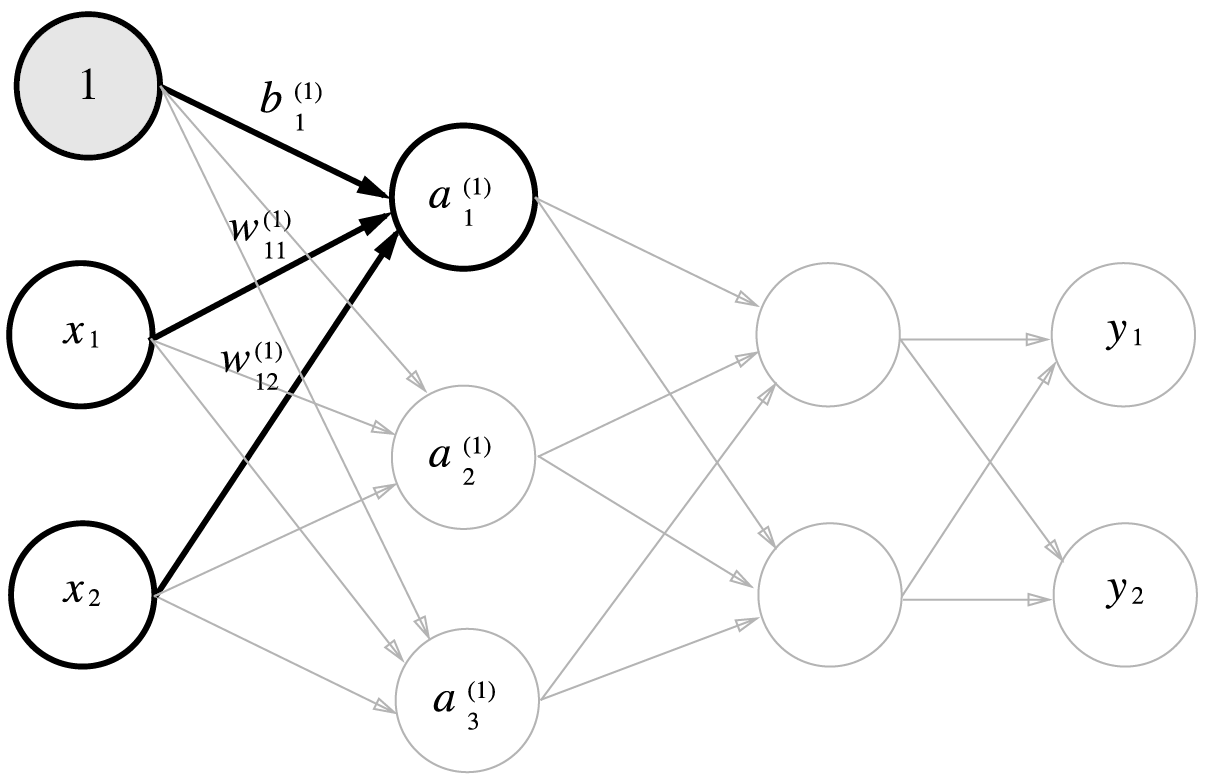

In [25]:
Image('./deep_learning_images/fig 3-17.png', width=400)

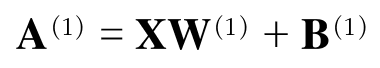

In [26]:
Image('./deep_learning_images/e 3.9.png', width=400)

In [26]:
X = np.array([1.0, 0.5]) # (2,)
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # (2, 3)
B1 = np.array([0.1, 0.2, 0.3]) # (3)

A1 = np.dot(X, W1) + B1
print(X.shape, W1.shape, B1.shape, A1.shape)

(2,) (2, 3) (3,) (3,)


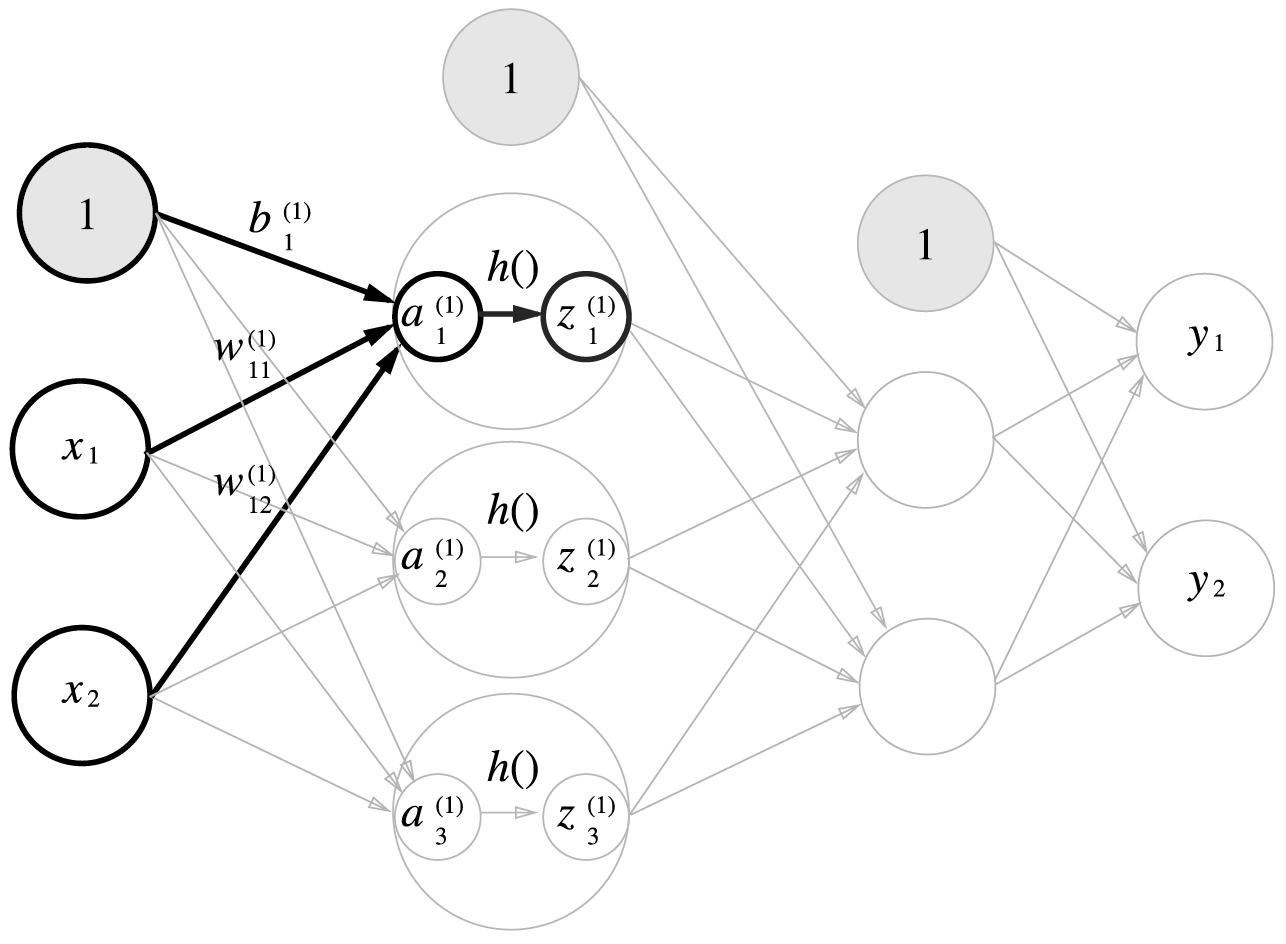

In [28]:
Image('./deep_learning_images/fig 3-18.png', width=400)

In [29]:
Z1 = sigmoid(A1) # (3,)

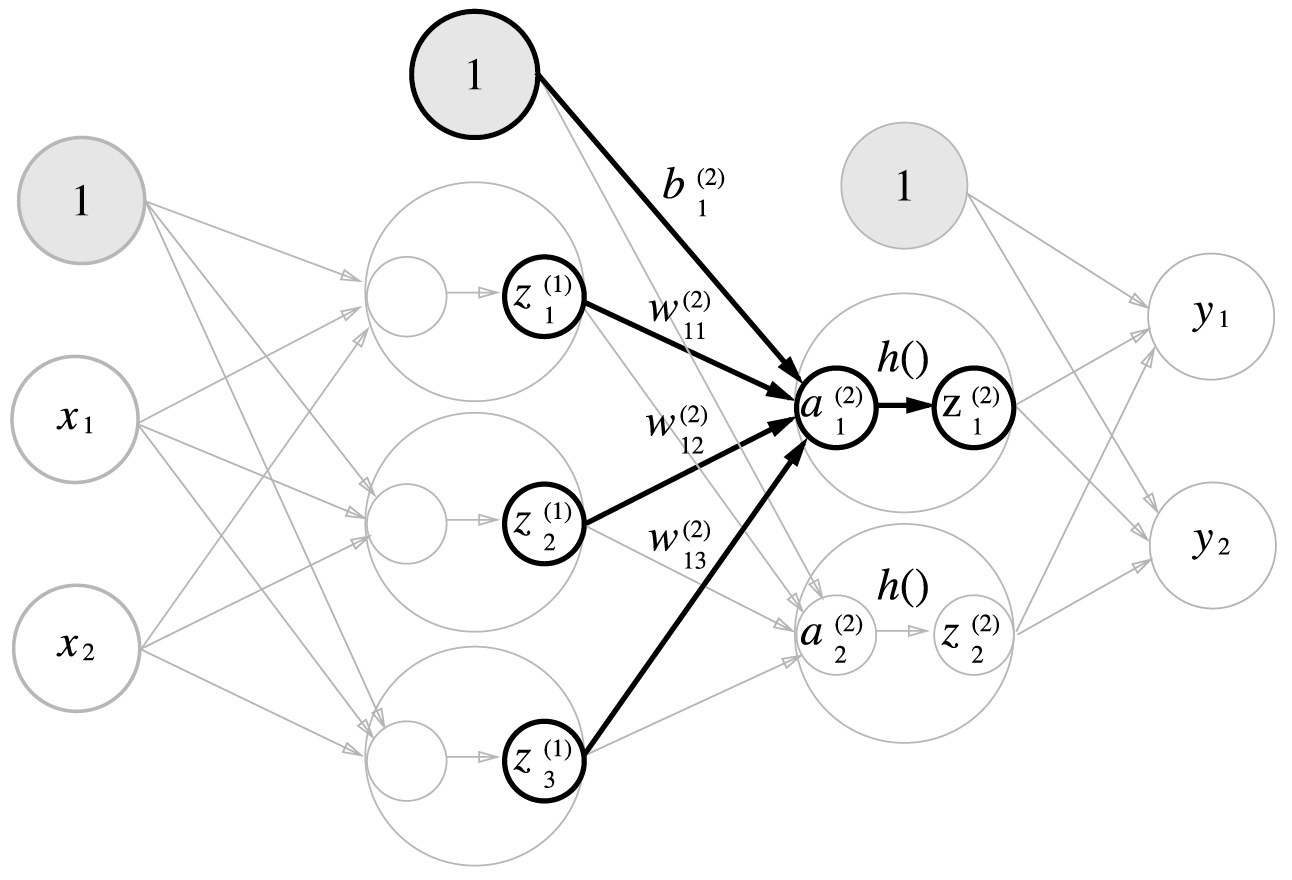

In [30]:
Image('./deep_learning_images/fig 3-19.png', width=400)

In [30]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])# (3, 2)   
B2 = np.array([0.1, 0.2])# (2,)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(W2.shape,B2.shape, A2.shape, Z2.shape)

(3, 2) (2,) (2,) (2,)


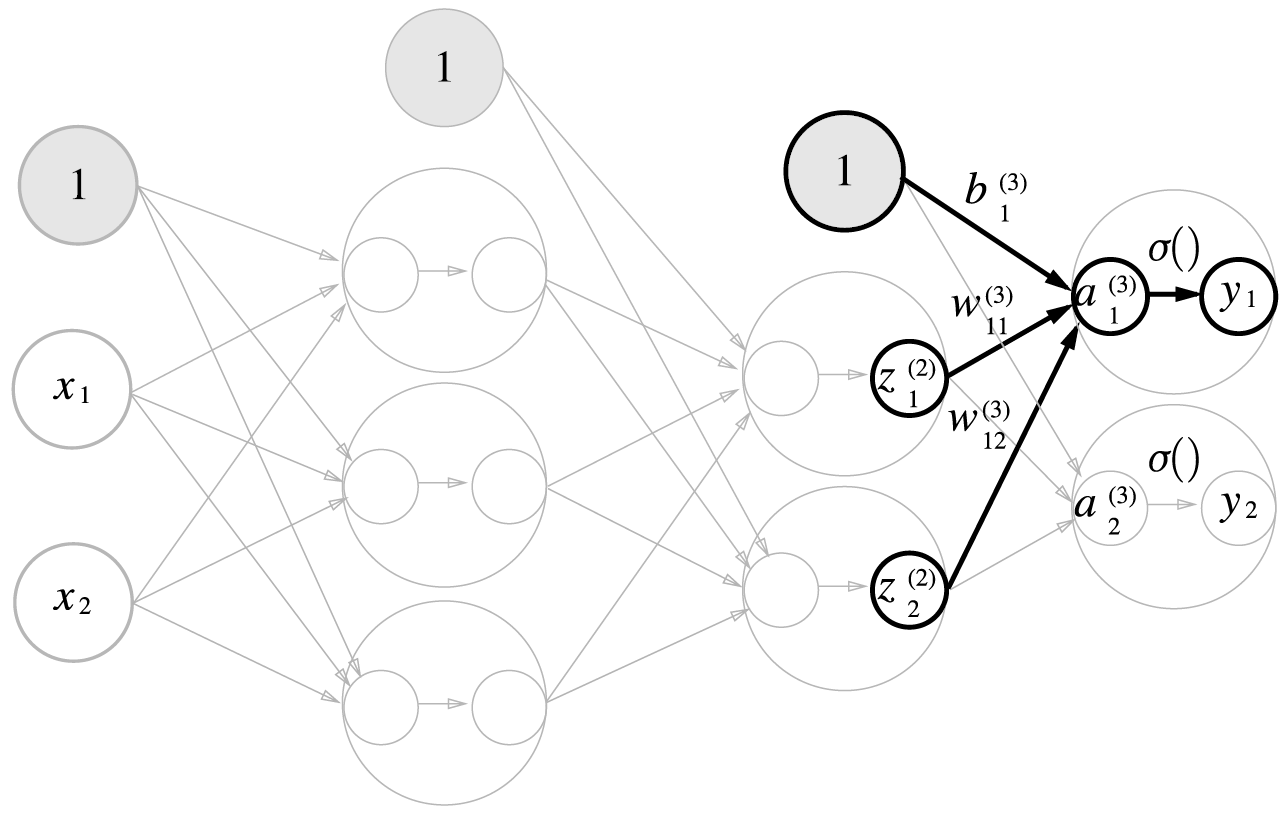

In [32]:
Image('./deep_learning_images/fig 3-20.png', width=400)

In [31]:
def identy_function(x):
    return x

In [32]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]]) # (2, 2)
B3 = np.array([0.1, 0.2]) # (2,)
A3 = np.dot(Z2, W3) + B3 # (2,)
Y = identy_function(A3) # (2, )
print(W3.shape, B3.shape, A3.shape, Y.shape)

(2, 2) (2,) (2,) (2,)


## 출력층(Softmax 함수)

In [64]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 3층 신경망 구현

In [33]:
def init_network():
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["B1"] = np.array([0.1, 0.2, 0.3])

    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["B2"] = np.array([0.1, 0.2])

    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["B3"] = np.array([0.1, 0.2])
    return network

In [34]:
def forward(network, X): # predict

    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    B1, B2, B3 = network["B1"], network["B2"], network["B3"]

    A1 = np.dot(X, W1) + B1
    Z1 = sigmoid(A1)

    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)

    A3 = np.dot(Z2, W3) + B3 
    Y = identy_function(A3) 
    
    return Y

In [35]:
network = init_network()
X = np.array([1.0, 0.5])
Y = forward(network, X)

In [36]:
Y

array([0.31682708, 0.69627909])

## 손글씨 숫자(MNIST)

In [37]:
from dataset.mnist import load_mnist

In [38]:
def get_data():
    (X_train, y_train), (X_test, y_test)= load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return X_test, y_test

In [39]:
X_test, y_test = get_data()

In [40]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

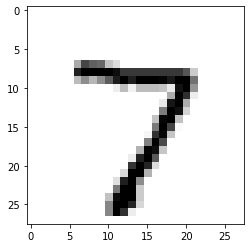

In [45]:
plt.imshow(X_test[0].reshape(28, 28), cmap="binary")

In [46]:
import pickle

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

In [47]:
network = init_network()
network.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])

In [50]:
network["W1"].shape, network["W2"].shape, network["W3"].shape

((784, 50), (50, 100), (100, 10))

In [51]:
network["b1"].shape, network["b2"].shape, network["b3"].shape

((50,), (100,), (10,))

- image 한장 입력에 대한 신경망 예측 과정

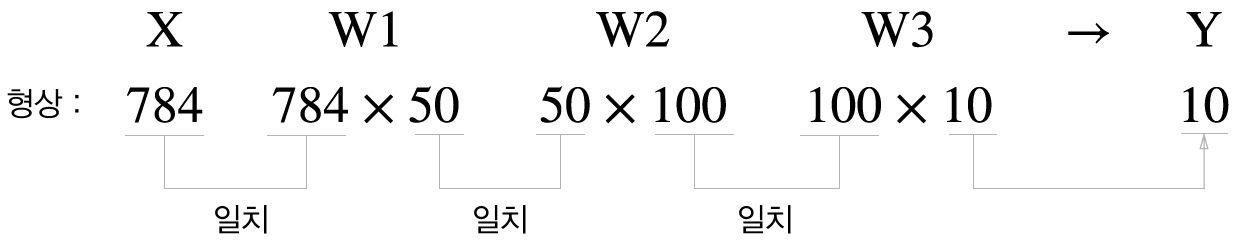

In [73]:
Image('./deep_learning_images/fig 3-26.png', width=400)

In [65]:
def predict(network, X):

    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    B1, B2, B3 = network["b1"], network["b2"], network["b3"]

    A1 = np.dot(X, W1) + B1
    Z1 = sigmoid(A1)

    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)

    A3 = np.dot(Z2, W3) + B3 
    Y = softmax(A3) 
    
    return Y

In [66]:
X_test[0].shape

(784,)

In [67]:
y = predict(network, X_test[0])
y

array([8.4412488e-05, 2.6350631e-06, 7.1549421e-04, 1.2586262e-03,
       1.1727954e-06, 4.4990808e-05, 1.6269318e-08, 9.9706501e-01,
       9.3744793e-06, 8.1831159e-04], dtype=float32)

In [68]:
# X_test, y_test
accuracy_cnt = 0
for i in range(len(X_test)): # 10000 iterations
    prob = predict(network, X_test[i])
    pred = np.argmax(prob) # predict : (0~9)까지의 값이 예측됨
    if pred == y_test[i]:
        accuracy_cnt += 1
print("Accuracy :", accuracy_cnt/len(X_test))        

Accuracy : 0.9352


- image 배치 입력에 대한 신경망 예측 과정

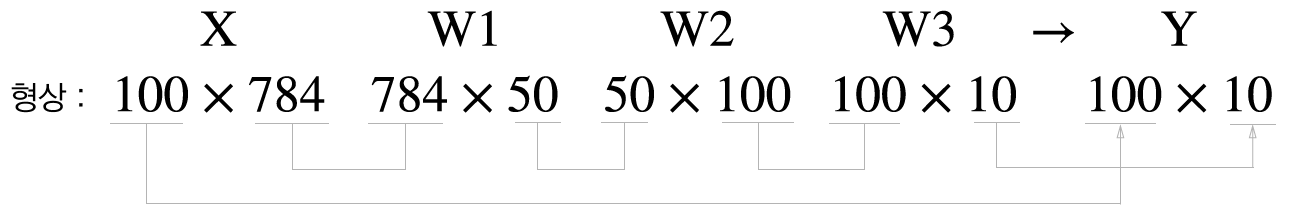

In [51]:
Image('./deep_learning_images/fig 3-27.png', width=400)

In [71]:
batch_size = 100
accuracy_cnt = 0
for i in range(0, len(X_test), batch_size): # 100장(배치)씩 100번 iterations
    x_batch = X_test[i:i+batch_size] # 100개씩 슬라이싱 (0~99, 100~199, 200~299......)
    prob = predict(network, x_batch) # 100개의 샘플에 대한 결과(probability)
    pred = np.argmax(prob, axis=1) # predict : (0~9)까지의 값이 예측됨
    accuracy_cnt += np.sum(pred == y_test[i:i+batch_size])
    
print("Accuracy :", accuracy_cnt/len(X_test))  

Accuracy : 0.9352
